[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/bigdata_analyst_cert/blob/main/part4/ch5/p5_type2.ipynb)

# 1. 문제정의
- 도서 참고

# 2. 라이브러리 및 데이터 불러오기

In [ ]:
# 데이터 불러오기
import pandas as pd
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part4/ch5/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part4/ch5/test.csv")

# 3. 탐색적 데이터 분석(EDA)

In [ ]:
# 데이터 크기 확인
train.shape, test.shape

((3759, 9), (1617, 8))

In [ ]:
# 샘플 확인
train.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,EcoSport,2017,10298,Manual,25013,Petrol,150,53.3,1.0
1,Focus,2016,10491,Manual,30970,Diesel,0,74.3,1.5
2,S-MAX,2017,13498,Manual,60200,Diesel,150,56.5,2.0


In [ ]:
test.head(3)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,S-MAX,2016,Manual,23905,Diesel,125,56.5,2.0
1,Fiesta,2018,Manual,16895,Petrol,145,40.3,1.5
2,Kuga,2017,Manual,12109,Petrol,165,45.6,1.5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3759 non-null   object 
 1   year          3759 non-null   int64  
 2   price         3759 non-null   int64  
 3   transmission  3759 non-null   object 
 4   mileage       3759 non-null   int64  
 5   fuelType      3759 non-null   object 
 6   tax           3759 non-null   int64  
 7   mpg           3759 non-null   float64
 8   engineSize    3759 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 264.4+ KB


In [ ]:
train.describe()

,year,price,mileage,tax,mpg,engineSize
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,2016.876031,12353.321362,23191.786379,114.444001,57.793083,1.352807
std,2.033660,4750.338051,19223.258713,61.713682,10.099221,0.437130
min,2002.000000,1095.000000,5.000000,0.000000,20.900000,0.000000
25%,2016.000000,9000.000000,9997.500000,75.000000,52.300000,1.000000
50%,2017.000000,11495.000000,18180.000000,145.000000,58.900000,1.200000
75%,2018.000000,15310.000000,31000.000000,145.000000,65.700000,1.500000
max,2020.000000,48000.000000,144000.000000,570.000000,201.800000,5.000000


In [ ]:
test.describe()

,year,mileage,tax,mpg,engineSize
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,2016.752628,23817.544836,113.089054,57.804082,1.362894
std,2.182152,20130.026364,63.584868,10.567025,0.436878
min,2005.000000,5.000000,0.000000,20.900000,0.000000
25%,2016.000000,10422.000000,30.000000,52.300000,1.000000
50%,2017.000000,18471.000000,145.000000,58.900000,1.200000
75%,2018.000000,31098.000000,145.000000,65.700000,1.600000
max,2020.000000,150890.000000,570.000000,201.800000,5.000000


In [ ]:
train.describe(include='O')

,model,transmission,fuelType
count,3759,3759,3759
unique,19,3,3
top,Fiesta,Manual,Petrol
freq,1372,3234,2541


In [ ]:
test.describe(include='O')

,model,transmission,fuelType
count,1617,1617,1617
unique,19,3,3
top,Fiesta,Manual,Petrol
freq,591,1385,1085


In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
train['price'].value_counts()

price
12000    33
9000     31
11000    30
11500    27
10000    27
         ..
8782      1
14620     1
15320     1
17994     1
6830      1
Name: count, Length: 1443, dtype: int64

<Axes: >

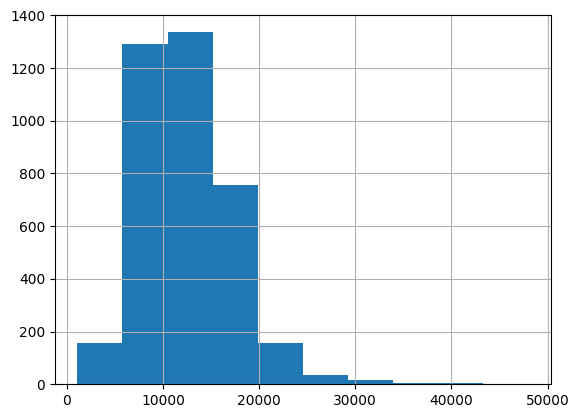

In [ ]:
train['price'].hist()

# 4. 데이터 전처리

In [ ]:
target = train.pop('price')

print(train.shape, test.shape)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(train.shape, test.shape)

(3759, 8) (1617, 8)
(3759, 30) (1617, 30)


# 5. 검증 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((3007, 30), (752, 30), (3007,), (752,))

# 6. 머신러닝 학습 및 평가

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_tr)
pred = lr.predict(X_val)
rmse(y_val, pred)

1822.4658269216968

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)
rmse(y_val, pred)

1342.4372706543252

In [ ]:
# Xgboost
import xgboost as xgb
xg = xgb.XGBRegressor(random_state=0)
xg.fit(X_tr, y_tr)
pred = xg.predict(X_val)
rmse(y_val, pred)

1252.4232343438716

In [ ]:
# LightGBM
import lightgbm as lgb
lg = lgb.LGBMRegressor(random_state=0, verbose=-1)
lg.fit(X_tr, y_tr)
pred = lg.predict(X_val)
rmse(y_val, pred)

1221.9041801017495

# 7. 예측 및 결과 파일 생성

In [ ]:
pred = lg.predict(test)
result = pd.DataFrame({
    'pred':pred
})
result.to_csv("result.csv", index=False)

In [ ]:
pd.read_csv('result.csv')

,pred
0,15608.179533
1,16253.821307
2,14625.513849
3,17710.268855
4,6421.654383
...,...
1612,10979.790600
1613,17712.971139
1614,9202.004820
1615,14188.185921


# 8. 성능 개선

In [ ]:
# 데이터 불러오기
import pandas as pd
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part4/ch5/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part4/ch5/test.csv")

# target 데이터
target = train.pop('price')

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
cols = train.select_dtypes(include='O').columns

for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# 검증데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=0)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

# LightGBM
import lightgbm as lgb
lg = lgb.LGBMRegressor(random_state=0, verbose=-1)
lg.fit(X_tr, y_tr)
pred = lg.predict(X_val)
rmse(y_val, pred)

# 베이스라인(원핫 인코딩): 1221.9041801017495
# 레이블 인코딩: 1184.573934411357

1184.573934411357

In [ ]:
# 최종 제출 파일
pred = lg.predict(test)
result = pd.DataFrame({
    'pred':pred
})
result.to_csv("result.csv", index=False)